In [2]:
import pandas as pd
import pybaseball
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import pybaseball
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.multitest import multipletests
import pickle
import gzip
import scipy.stats as stats
import statsmodels.formula.api as smf

# Load Data

In [3]:
regular_df = pd.read_csv('data/regular_season.csv')
playoff_df = pd.read_csv('data/playoff.csv')
stats_df = pd.read_csv('data/stats.csv')

In [4]:
# 변수명 변경
regular_df.rename(columns={'entity_id':'mlbID','year':'Season'},inplace=True)
playoff_df.rename(columns={'entity_id':'mlbID','year':'Season'},inplace=True)

# columns 변수 저장
tempo_col = regular_df.columns
stats_col = stats_df.columns

In [5]:
regular_df.head()

,mlbID,entity_name,Season,tot_n,freq_hot,freq_warm,freq_cold,median_seconds,tot_n_empty,freq_hot_empty,freq_warm_empty,freq_cold_empty,median_seconds_empty,tot_n_onbase,freq_hot_onbase,freq_warm_onbase,freq_cold_onbase,median_seconds_onbase,team_name
0,671096,"Abbott, Andrew",2024,549,0.444444,0.553734,0.001821,15.468,366,0.658470,0.341530,0.000000,14.282,183,0.016393,0.978142,0.005464,18.314,CIN
1,671096,"Abbott, Andrew",2023,845,0.414201,0.583432,0.002367,15.780,552,0.634058,0.364130,0.001812,14.385,293,0.000000,0.996587,0.003413,19.691,CIN
2,676265,"Abbott, Cory",2022,358,0.229050,0.701117,0.069832,18.445,244,0.336066,0.651639,0.012295,16.119,114,0.000000,0.807018,0.192982,26.617,WSH
3,656061,"Abreu, Albert",2023,482,0.226141,0.763485,0.010373,17.466,250,0.384000,0.608000,0.008000,15.820,232,0.056034,0.931034,0.012931,19.229,NYY
4,656061,"Abreu, Albert",2022,325,0.095385,0.830769,0.073846,20.480,187,0.165775,0.812834,0.021390,17.937,138,0.000000,0.855072,0.144928,23.341,MLB


In [6]:
stats_df.head()

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID,Season
0,Albert Abreu,24,1384,Maj-AL,New York,2,0,NaN,1.0,NaN,...,0.09,0.33,0.33,0.00,4.500,0.600,13.5,1.00,656061,2020
1,Bryan Abreu,23,1414,Maj-AL,Houston,4,0,NaN,NaN,NaN,...,0.05,0.38,0.25,0.00,2.400,0.125,8.1,0.43,650556,2020
2,Jason Adam,28,1361,Maj-NL,Chicago,13,0,2.0,1.0,NaN,...,0.17,0.41,0.14,0.03,1.244,0.259,13.8,2.63,592094,2020
3,Austin Adams,29,1360,Maj-NL,San Diego,3,0,NaN,NaN,NaN,...,0.16,0.50,0.13,0.00,1.250,0.286,15.8,3.50,613534,2020
4,Chance Adams,25,1365,Maj-AL,Kansas City,6,0,NaN,NaN,NaN,...,0.06,0.31,0.34,0.09,1.731,0.424,6.2,NaN,664856,2020


In [7]:
data = pd.merge(stats_df,regular_df,on=['mlbID','Season']).reset_index(drop=True)
data.head()

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,freq_hot_empty,freq_warm_empty,freq_cold_empty,median_seconds_empty,tot_n_onbase,freq_hot_onbase,freq_warm_onbase,freq_cold_onbase,median_seconds_onbase,team_name
0,Keegan Akin,25,1360,Maj-AL,Baltimore,8,6,1.0,2.0,NaN,...,0.696000,0.296000,0.008000,13.315,99,0.101010,0.868687,0.030303,17.776,BAL
1,Jorge Alcal\xc3\xa1,24,1360,Maj-AL,Minnesota,16,0,2.0,1.0,NaN,...,0.267857,0.714286,0.017857,16.767,81,0.000000,0.901235,0.098765,23.645,MIN
2,Sandy Alc\xc3\xa1ntara,24,1362,Maj-NL,Miami,7,7,3.0,2.0,NaN,...,0.502488,0.477612,0.019900,14.991,95,0.021053,0.831579,0.147368,22.552,MIA
3,Tyler Alexander,25,1363,Maj-AL,Detroit,14,2,2.0,3.0,NaN,...,0.185185,0.804233,0.010582,17.311,96,0.000000,0.968750,0.031250,21.795,DET
4,Kolby Allard,22,1360,Maj-AL,Texas,11,8,NaN,6.0,NaN,...,0.260870,0.739130,0.000000,16.788,108,0.000000,0.916667,0.083333,22.089,TEX


In [8]:
data.loc[data['Season']==2024,'tot_n'].sort_values()

1587    140
1683    142
1876    142
1585    142
1668    143
       ... 
1632    629
1781    633
1907    633
1756    667
1936    696
Name: tot_n, Length: 382, dtype: int64

In [9]:
# tmp_statcast = pd.DataFrame()
# miss_id = []
# for id in df.mlbID.unique():
#     try:
#         tttmp = pybaseball.statcast_pitcher('2020-01-01', '2024-12-31', id)
#         tmp_statcast = pd.concat([tmp_statcast,tttmp])
#     except:
#         miss_id.append(id)

In [10]:
# with gzip.open('statcast_data_groupby.pkl', 'wb') as f:
#     pickle.dump(tmp_stat2, f)

# # load and uncompress.
with gzip.open('statcast_data_groupby_ver2.pkl','rb') as f:
    statcast = pickle.load(f)

In [11]:
statcast

,Season,player_name,pitcher,pitch_type,release_speed,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,release_extension,count
0,2020,"Abreu, Albert",656061,CH,86.680000,7.413133,-125.935739,-4.310912,-17.581364,26.877085,-24.654723,86.960000,1934.000000,6.660000,10
1,2020,"Abreu, Albert",656061,CU,81.666667,6.438526,-118.760587,-3.080777,4.227657,25.162042,-42.287967,81.333333,2518.000000,6.333333,3
2,2020,"Abreu, Albert",656061,FF,96.363636,8.982452,-139.904335,-4.987276,-16.017415,33.480902,-16.391034,96.500000,2018.181818,6.627273,22
3,2020,"Abreu, Albert",656061,SL,85.750000,5.784673,-124.712889,-3.299079,2.193783,26.340929,-29.794307,85.812500,2139.875000,6.487500,8
4,2020,"Abreu, Bryan",650556,CH,91.600000,2.849307,-133.323400,-4.414408,-5.871194,29.096572,-19.569838,91.800000,1846.000000,6.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,2024,"Yarbrough, Ryan",642232,CH,77.444954,-7.291977,-112.557510,0.084645,12.675124,20.449528,-30.404521,77.423853,1872.045872,6.336697,109
5203,2024,"Yarbrough, Ryan",642232,CU,71.503782,-5.373905,-103.953488,1.038344,-8.321551,18.490317,-29.139341,71.276271,2182.546218,6.280672,238
5204,2024,"Yarbrough, Ryan",642232,FC,83.625517,-8.784436,-121.524365,1.012695,2.619867,21.991604,-25.153054,83.818621,2000.931034,6.316552,145
5205,2024,"Yarbrough, Ryan",642232,FF,86.247500,-10.178760,-125.188042,-0.801497,14.355889,24.940870,-23.847590,86.135625,1856.306250,6.321250,160


# data range

In [12]:
# 2023년의 피치템포 기록이 존재하는 선수들의 mlbID
id_23 = data.loc[data['Season']==2023,'mlbID']

# 2022년의 피치템포 기록이 존재하는 선수들의 mlbID
id_22 = data.loc[data['Season']==2022,'mlbID']

# df : 22,23년의 피치템포 데이터가 모두 존재하는 선수들의 dataframe
df = data[(data['mlbID'].isin(id_23))&(data['mlbID'].isin(id_22))]

# 이상치 제거
#df2 = df2[df2['ERA']<=7]

# Grouping

In [13]:
df_20 = df[df['Season']==2020]
df_21 = df[df['Season']==2021]
df_22 = df[df['Season']==2022]
df_23 = df[df['Season']==2023]
df_24 = df[df['Season']==2024]
df_list = [df_20,df_21,df_22,df_23,df_24]
season_list = [20,21,22,23,24]

In [14]:
def divide_3(tmp_df):
    cut1 = tmp_df['median_seconds'].quantile(.3)
    cut2 = tmp_df['median_seconds'].quantile(.7)
    
    tmp_df.loc[tmp_df['median_seconds']<= cut1,'3g'] = 'short'
    tmp_df.loc[tmp_df['median_seconds']>= cut2,'3g'] = 'long'
    tmp_df['3g'] = tmp_df['3g'].fillna('middle')

    mapping_dict = tmp_df.set_index('mlbID')['3g'].to_dict()

    long_id = tmp_df.loc[tmp_df['3g']=='long','mlbID']
    middle_id = tmp_df.loc[tmp_df['3g']=='middle','mlbID']
    short_id = tmp_df.loc[tmp_df['3g']=='short','mlbID']

    return cut1,cut2, mapping_dict
    
def divide_4(tmp_df):
    cut1 = tmp_df['median_seconds'].quantile(.25)
    cut2 = tmp_df['median_seconds'].quantile(.5)
    cut3 = tmp_df['median_seconds'].quantile(.75)
    
    tmp_df.loc[tmp_df['median_seconds']<= cut1,'4g'] = 'short'
    tmp_df.loc[tmp_df['median_seconds']>= cut3,'4g'] = 'long'
    tmp_df.loc[(tmp_df['4g'].isna())&(tmp_df['median_seconds']<=cut2),'4g'] = 'mid_short'
    tmp_df['4g'] = tmp_df['4g'].fillna('mid_long')
    
    mapping_dict = tmp_df.set_index('mlbID')['4g'].to_dict()

    long_id = tmp_df.loc[tmp_df['4g']=='long','mlbID']
    mid_long_id = tmp_df.loc[tmp_df['4g']=='mid_long','mlbID']
    mid_short_id = tmp_df.loc[tmp_df['4g']=='mid_short','mlbID']
    short_id = tmp_df.loc[tmp_df['4g']=='short','mlbID']

    return cut1,cut2,cut3,mapping_dict

In [15]:
pd.set_option('mode.chained_assignment', None)  # default='warn'
cut_point_dict = {}
for i in range(5):
    season = season_list[i]
    df_season = df_list[i]

    c1,c2,dict_3g = divide_3(df_season)
    cut_point_dict[str(season)+'_3g'] = [c1,c2]
    df[str(season)+'_3g'] = df['mlbID'].map(dict_3g)
    
    c1,c2,c3,dict_4g = divide_4(df_season)
    cut_point_dict[str(season)+'_4g'] = [c1,c2,c3]
    df[str(season)+'_4g'] = df['mlbID'].map(dict_4g)
    

In [16]:
df['22_4g'].value_counts()

short        250
mid_short    245
long         244
mid_long     219
Name: 22_4g, dtype: int64

In [17]:
cut_point_dict

{'20_3g': [18.4812, 20.4098],
 '20_4g': [18.321, 19.385, 20.921],
 '21_3g': [18.7584, 21.334],
 '21_4g': [18.622, 20.028, 21.582],
 '22_3g': [18.667, 21.170599999999997],
 '22_4g': [18.43875, 19.7185, 21.56625],
 '23_3g': [15.9282, 17.4],
 '23_4g': [15.7055, 16.726, 17.60125],
 '24_3g': [15.787600000000001, 17.5077],
 '24_4g': [15.355, 16.633499999999998, 17.644]}

# data merging

In [18]:
df.head()

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,20_3g,20_4g,21_3g,21_4g,22_3g,22_4g,23_3g,23_4g,24_3g,24_4g
2,Sandy Alc\xc3\xa1ntara,24,1362,Maj-NL,Miami,7,7,3.0,2.0,NaN,...,short,short,short,short,short,short,short,short,NaN,NaN
12,Tyler Anderson,30,1362,Maj-NL,San Francisco,13,11,4.0,3.0,NaN,...,middle,mid_long,middle,mid_short,middle,mid_short,middle,mid_short,short,short
18,Daniel Bard,35,1363,Maj-NL,Colorado,23,0,4.0,2.0,6.0,...,long,long,long,long,long,long,long,long,NaN,NaN
19,Scott Barlow,27,1360,Maj-AL,Kansas City,32,0,2.0,1.0,2.0,...,long,long,long,long,long,long,middle,mid_long,middle,mid_long
22,Jaime Barria,23,1364,Maj-AL,Los Angeles,7,5,1.0,NaN,NaN,...,middle,mid_short,middle,mid_short,short,short,short,short,NaN,NaN


In [19]:
statcast['Season'] = statcast['Season'].astype(int)
statcast = statcast.rename(columns={'pitcher': 'mlbID'})
statcast.head()

,Season,player_name,mlbID,pitch_type,release_speed,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,release_extension,count
0,2020,"Abreu, Albert",656061,CH,86.680000,7.413133,-125.935739,-4.310912,-17.581364,26.877085,-24.654723,86.960000,1934.000000,6.660000,10
1,2020,"Abreu, Albert",656061,CU,81.666667,6.438526,-118.760587,-3.080777,4.227657,25.162042,-42.287967,81.333333,2518.000000,6.333333,3
2,2020,"Abreu, Albert",656061,FF,96.363636,8.982452,-139.904335,-4.987276,-16.017415,33.480902,-16.391034,96.500000,2018.181818,6.627273,22
3,2020,"Abreu, Albert",656061,SL,85.750000,5.784673,-124.712889,-3.299079,2.193783,26.340929,-29.794307,85.812500,2139.875000,6.487500,8
4,2020,"Abreu, Bryan",650556,CH,91.600000,2.849307,-133.323400,-4.414408,-5.871194,29.096572,-19.569838,91.800000,1846.000000,6.400000,1


In [20]:
merged_df = pd.merge(df,statcast,on=['Season','mlbID'])

# Visualization

## 3group_statcast

In [21]:
merged_22_3g = merged_df.groupby(['22_3g','pitch_type','count','Season'])[['release_speed','release_spin_rate','effective_speed']].mean().reset_index()
merged_22_3g.head()

,22_3g,pitch_type,count,Season,release_speed,release_spin_rate,effective_speed
0,long,CH,1,2020,89.400000,1566.000000,89.700000
1,long,CH,1,2021,69.700000,1402.000000,69.600000
2,long,CH,1,2022,85.333333,2000.666667,86.066667
3,long,CH,1,2024,NaN,NaN,NaN
4,long,CH,2,2020,86.300000,1443.000000,87.300000


### release_speed

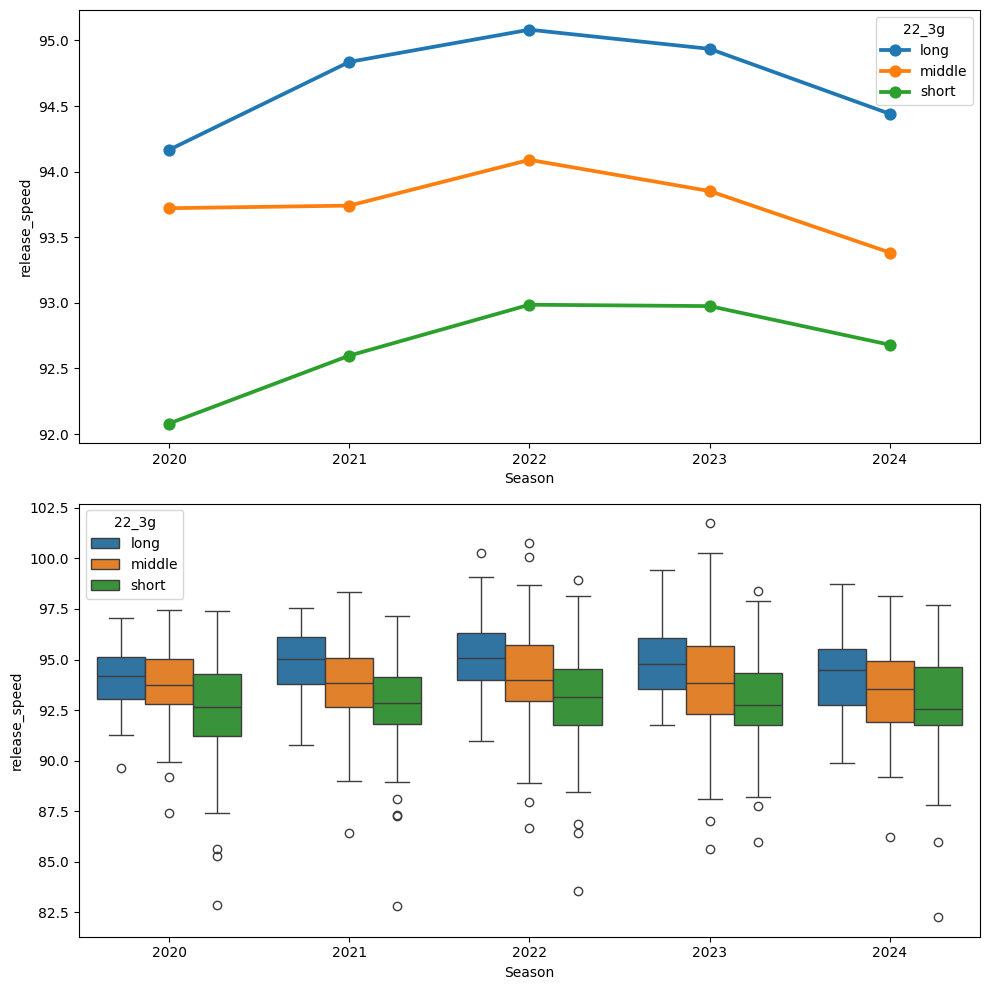

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='release_speed',hue='22_3g',errorbar=None)
plt.subplot(2,1,2)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.boxplot(data=tmp_df,x='Season',y='release_speed',hue='22_3g')
plt.tight_layout()
plt.show()

In [23]:
# plt.figure(figsize=(8,6))
# tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
# sns.boxplot(data=tmp_df,x='Season',y='release_speed',hue='22_3g')
# plt.tight_layout()
# plt.show()

### release_spin_rate

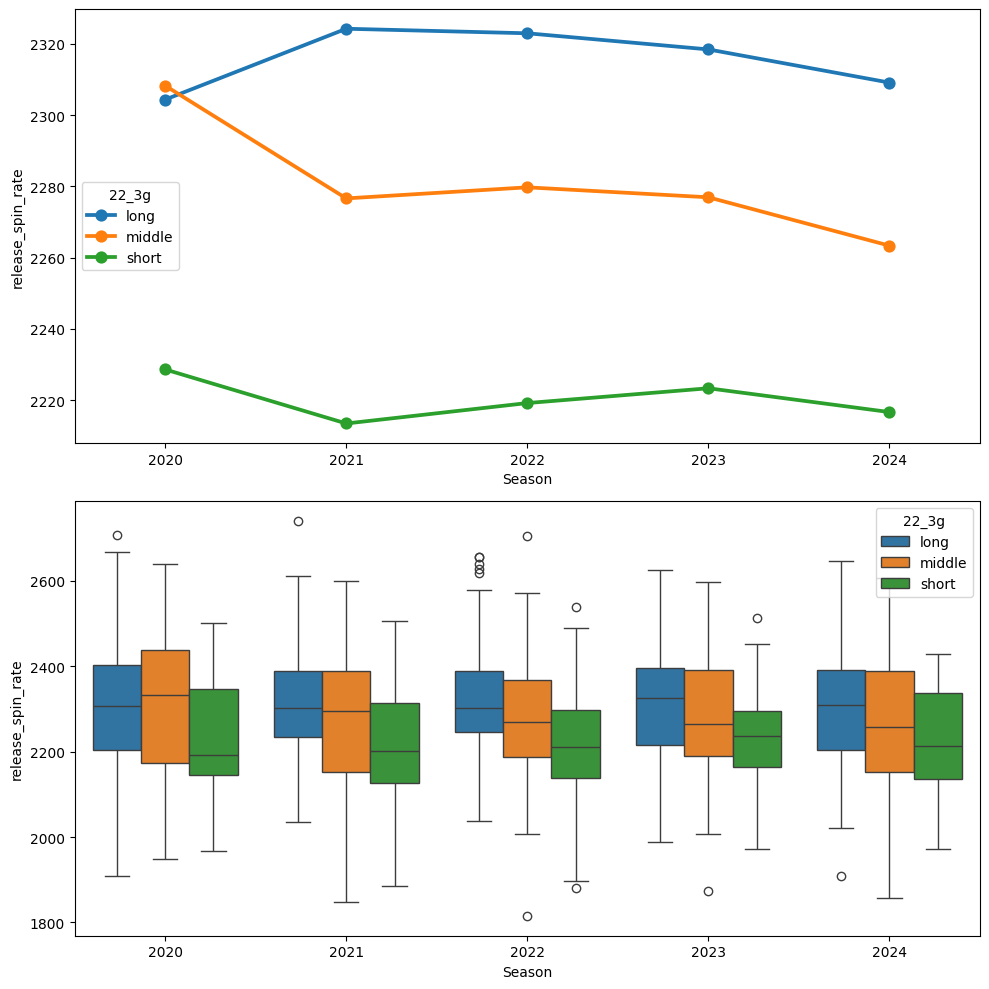

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='release_spin_rate',hue='22_3g',errorbar=None)
plt.subplot(2,1,2)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.boxplot(data=tmp_df,x='Season',y='release_spin_rate',hue='22_3g')
plt.tight_layout()
plt.show()

In [25]:
# plt.figure(figsize=(8,6))
# tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
# sns.boxplot(data=tmp_df,x='Season',y='release_spin_rate',hue='22_3g')
# plt.show()

### effective_speed

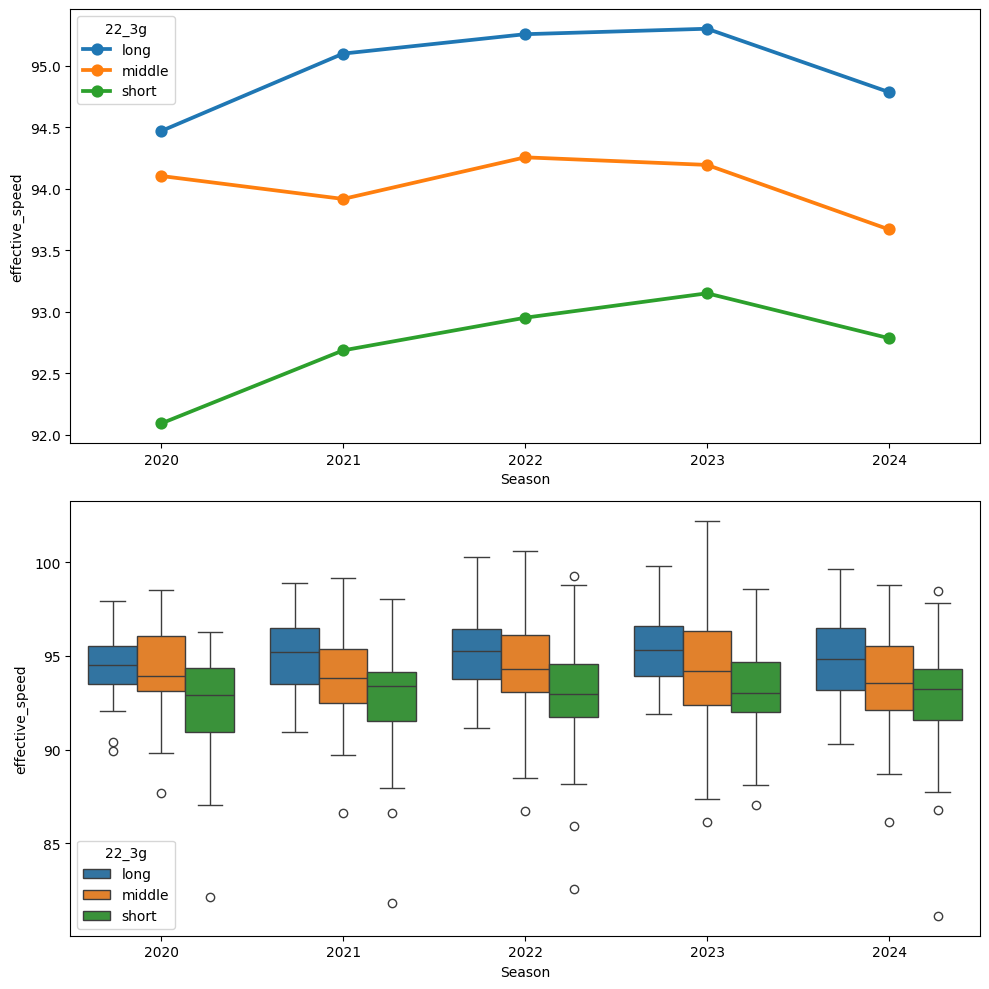

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='effective_speed',hue='22_3g',errorbar=None)
plt.subplot(2,1,2)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.boxplot(data=tmp_df,x='Season',y='effective_speed',hue='22_3g')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='effective_speed',hue='22_3g',errorbar=None)
plt.subplot(2,1,2)
tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
sns.boxplot(data=tmp_df,x='Season',y='effective_speed',hue='22_3g')
plt.tight_layout()
plt.show()

In [27]:
# plt.figure(figsize=(10,10))
# plt.subplot(2,1,1)
# sns.pointplot(data=merged_df,x='Season',y='IP',hue='22_3g',errorbar=None)
# plt.subplot(2,1,2)
# sns.boxplot(data=merged_df,x='Season',y='IP',hue='22_3g')
# plt.tight_layout()
# plt.show()

## 4group_statcast

In [26]:
merged_22_4g = merged_df.groupby(['22_4g','pitch_type','count','Season'])[['release_speed','release_spin_rate','effective_speed']].mean().reset_index()
merged_22_4g.head()

,22_4g,pitch_type,count,Season,release_speed,release_spin_rate,effective_speed
0,long,CH,1,2020,89.400000,1566.000000,89.700000
1,long,CH,1,2021,69.700000,1402.000000,69.600000
2,long,CH,1,2022,85.333333,2000.666667,86.066667
3,long,CH,1,2024,NaN,NaN,NaN
4,long,CH,2,2020,86.300000,1443.000000,87.300000


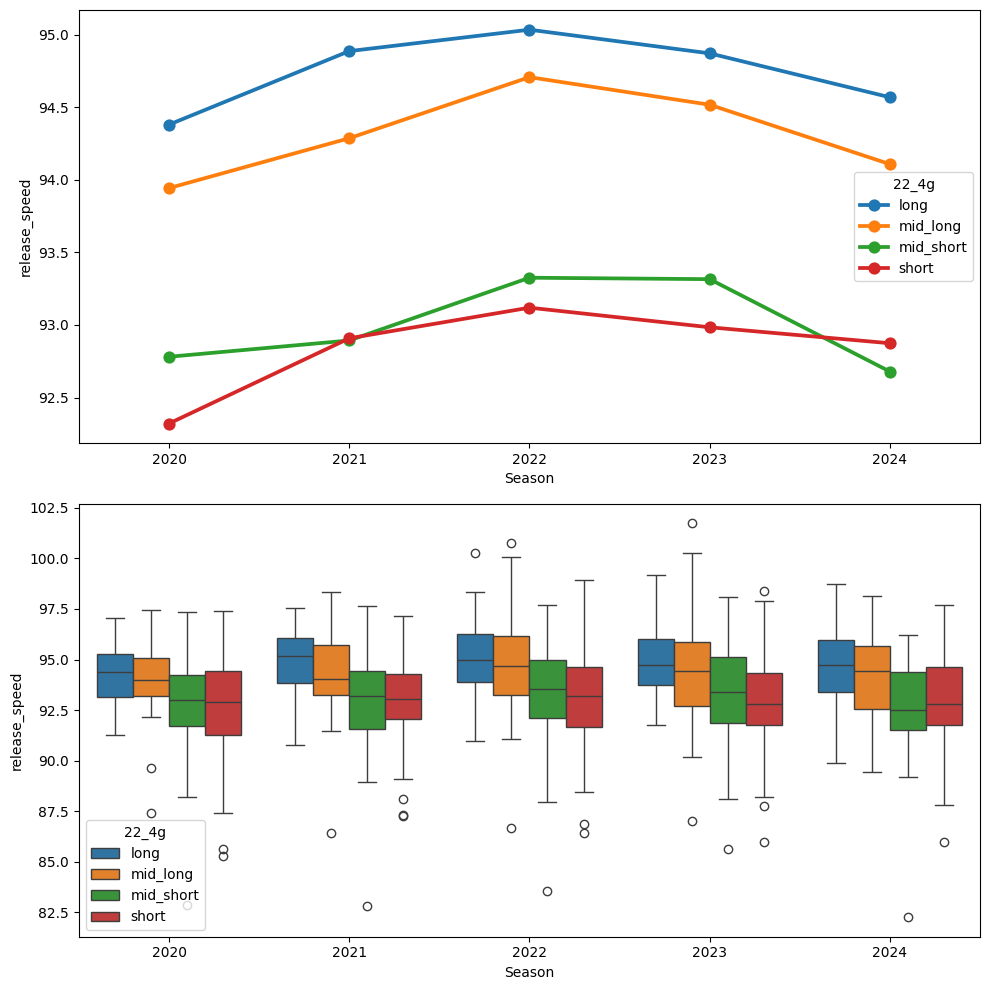

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_4g[merged_22_4g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='release_speed',hue='22_4g',errorbar=None)
plt.subplot(2,1,2)
tmp_df = merged_22_4g[merged_22_4g['pitch_type']=='FF']
sns.boxplot(data=tmp_df,x='Season',y='release_speed',hue='22_4g')
plt.tight_layout()
plt.show()

In [28]:
# plt.figure(figsize=(8,6))
# tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
# sns.boxplot(data=tmp_df,x='Season',y='release_speed',hue='22_3g')
# plt.tight_layout()
# plt.show()

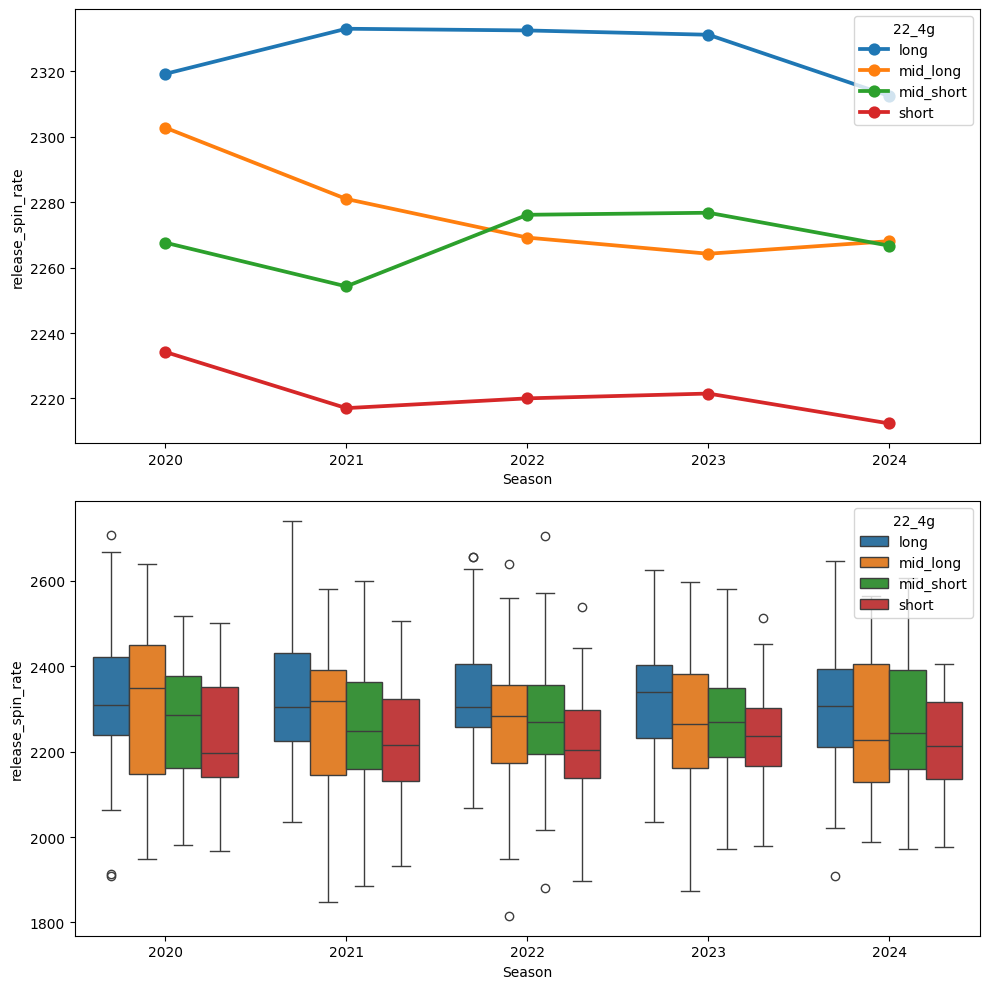

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_4g[merged_22_4g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='release_spin_rate',hue='22_4g',errorbar=None)
plt.subplot(2,1,2)
sns.boxplot(data=tmp_df,x='Season',y='release_spin_rate',hue='22_4g')
plt.tight_layout()
plt.show()

In [30]:
# plt.figure(figsize=(8,6))
# tmp_df = merged_22_3g[merged_22_3g['pitch_type']=='FF']
# sns.boxplot(data=tmp_df,x='Season',y='release_spin_rate',hue='22_3g')
# plt.show()

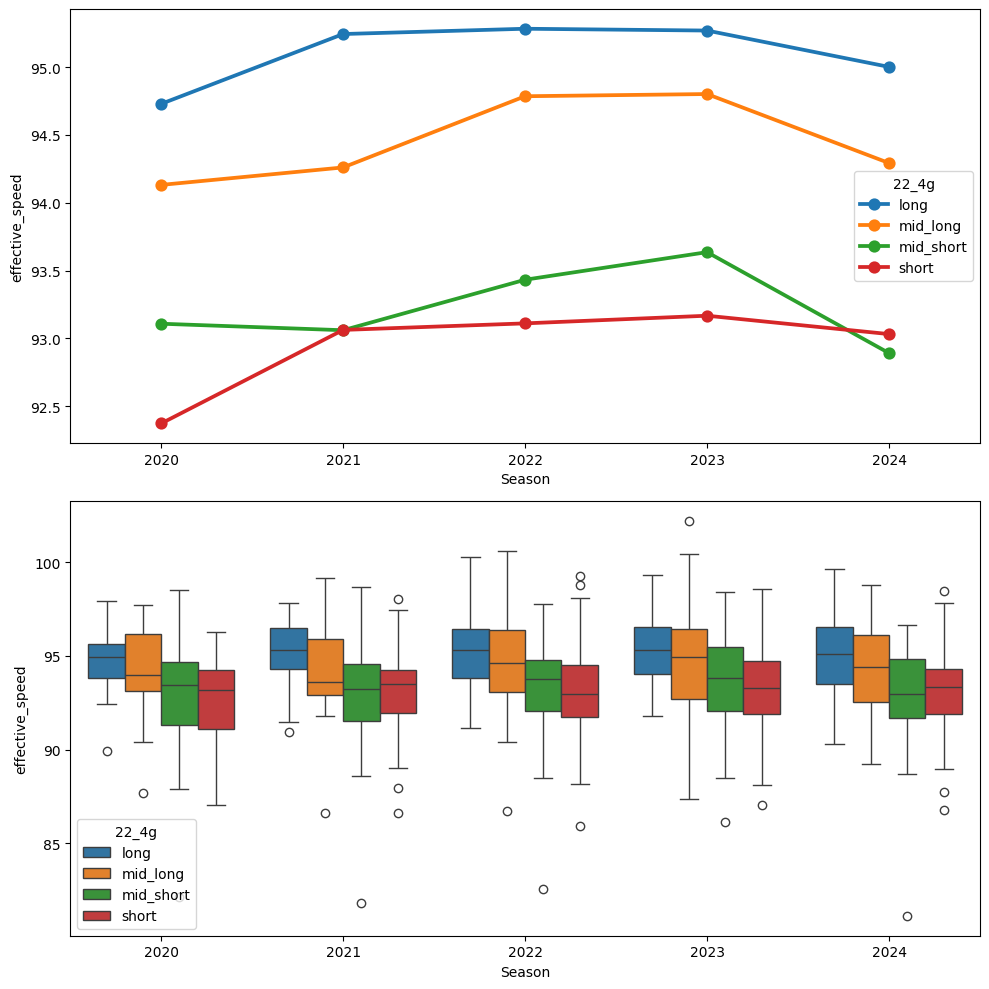

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
tmp_df = merged_22_4g[merged_22_4g['pitch_type']=='FF']
sns.pointplot(data=tmp_df,x='Season',y='effective_speed',hue='22_4g',errorbar=None)
plt.subplot(2,1,2)
sns.boxplot(data=tmp_df,x='Season',y='effective_speed',hue='22_4g')
plt.tight_layout()
plt.show()

In [32]:
merged_df[merged_df['release_speed']>=100][['player_name','pitch_type','Season','count','release_speed','release_spin_rate']]

,player_name,pitch_type,Season,count,release_speed,release_spin_rate
1647,"Duran, Jhoan",FF,2022,519,100.780154,2172.084778
1856,"Hicks, Jordan",FF,2022,6,100.050000,2177.833333
2155,"Muñoz, Andrés",FF,2022,396,100.254293,2299.809645
2156,"Muñoz, Andrés",SI,2022,2,101.450000,2205.500000
2823,"Duran, Jhoan",FF,2023,512,101.738867,2100.214844
3038,"Hicks, Jordan",FF,2023,131,100.290076,2353.423077
3040,"Hicks, Jordan",SI,2023,830,100.139518,2095.879802


In [33]:
merged_df[(merged_df['pitch_type']=='FF')&(merged_df['release_speed']<=85)][['player_name','pitch_type','Season','count','release_speed','release_spin_rate']]

,player_name,pitch_type,Season,count,release_speed,release_spin_rate
468,"Rogers, Tyler",FF,2020,52,82.848077,1980.557692
1211,"Rogers, Tyler",FF,2021,42,82.842857,1884.619048
2299,"Rogers, Tyler",FF,2022,25,83.564000,1881.560000
4394,"Rogers, Tyler",FF,2024,4,82.275000,1972.000000


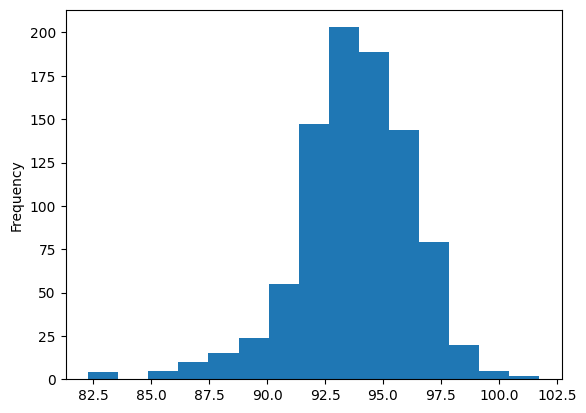

In [34]:
merged_df[merged_df['pitch_type']=='FF']['release_speed'].plot(kind='hist',bins=15)
plt.show()

In [35]:
merged_df[merged_df['pitch_type']=='FF'][['ERA','median_seconds','HR','release_spin_rate','release_speed']].corr()

,ERA,median_seconds,HR,release_spin_rate,release_speed
ERA,1.000000,-0.182036,0.216026,-0.183804,-0.208952
median_seconds,-0.182036,1.000000,-0.156238,0.164259,0.213151
HR,0.216026,-0.156238,1.000000,-0.099699,-0.170796
release_spin_rate,-0.183804,0.164259,-0.099699,1.000000,0.321314
release_speed,-0.208952,0.213151,-0.170796,0.321314,1.000000


## ERA ~ 구속

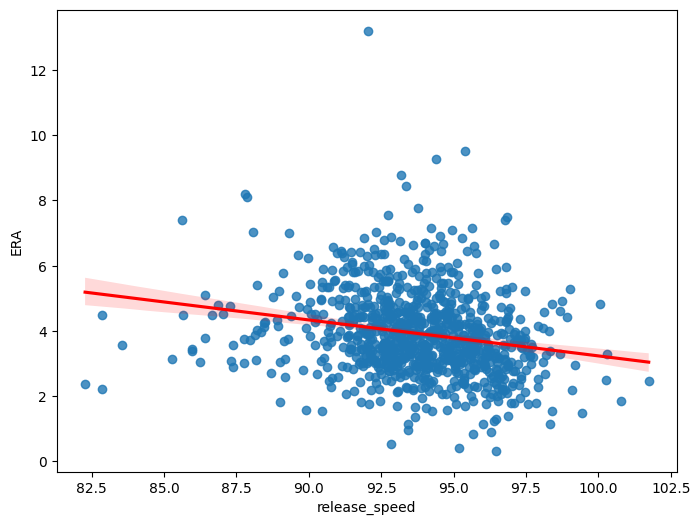

In [36]:
plt.figure(figsize=(8,6))
sns.regplot(data=merged_df[merged_df['pitch_type']=='FF'],x='release_speed',y='ERA',line_kws={'color':'r'})
plt.show()

## ERA ~ 회전수

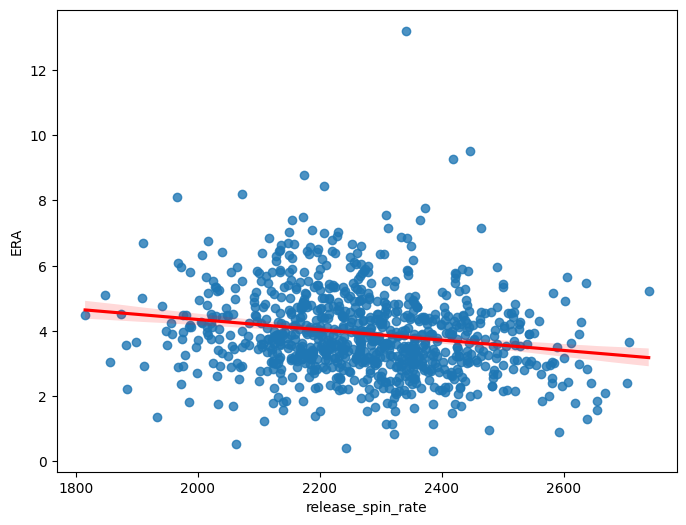

In [37]:
plt.figure(figsize=(8,6))
sns.regplot(data=merged_df[merged_df['pitch_type']=='FF'],x='release_spin_rate',y='ERA',line_kws={'color':'r'})
plt.show()

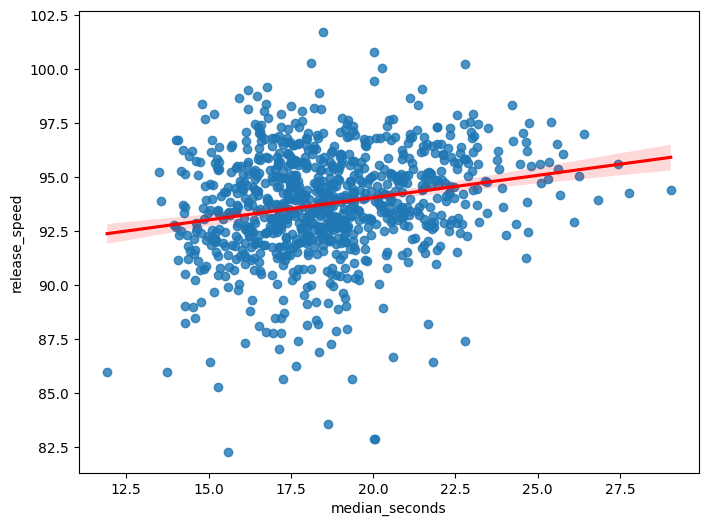

In [38]:
plt.figure(figsize=(8,6))
sns.regplot(data=merged_df[merged_df['pitch_type']=='FF'],x='median_seconds',y='release_speed',line_kws={'color':'r'})
plt.show()

## Age ~ group

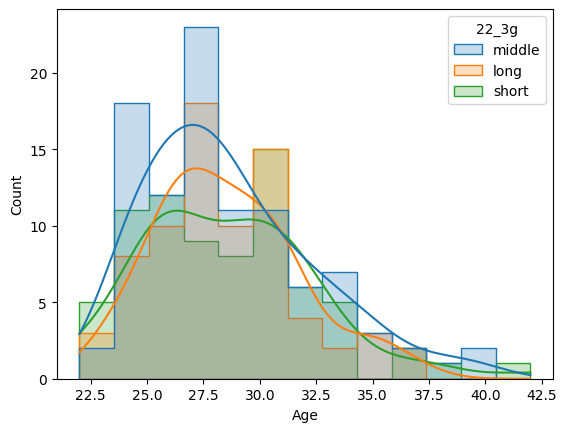

In [46]:
sns.histplot(data = df[df['Season']==2022],x='Age',hue='22_3g', element="step",kde=True)
plt.show()

<Axes: xlabel='ax', ylabel='vx0'>

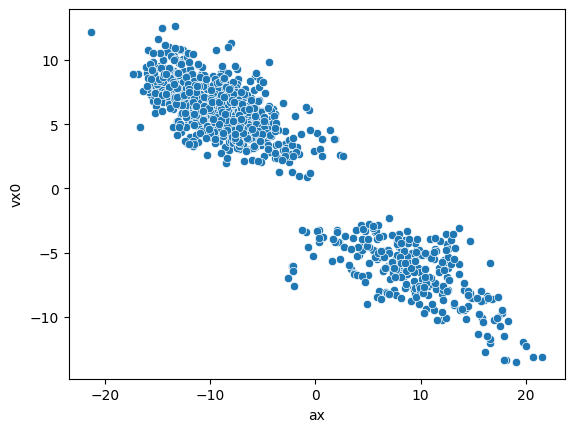

In [30]:
sns.scatterplot(data = statcast[statcast['pitch_type']=='FF'],x='ax',y='vx0')

In [278]:
# merged_df['scaeld_ERA'] = ((merged_df['ERA'] - merged_df['ERA'].mean())/merged_df['ERA'].std())
# merged_df['scaeld_median_seconds'] = ((merged_df['median_seconds'] - merged_df['median_seconds'].mean())/merged_df['median_seconds'].std())

In [45]:
# model = smf.ols('ERA ~ median_seconds+release_speed', data = merged_df).fit()
# model.summary()

In [90]:
df_22[(df_22['G']!=df_22['GS'])&(df_22['GS']>=10)]

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,freq_cold_empty,median_seconds_empty,tot_n_onbase,freq_hot_onbase,freq_warm_onbase,freq_cold_onbase,median_seconds_onbase,team_name,3g,4g
810,Tyler Anderson,32,625,Maj-NL,Los Angeles,30,28,15.0,5.0,NaN,...,0.005284,17.418,314,0.000000,0.910828,0.089172,23.140,LAD,middle,mid_short
827,Brayan Bello,23,626,Maj-AL,Boston,13,11,2.0,8.0,NaN,...,0.026786,16.253,238,0.004202,0.722689,0.273109,26.341,BOS,long,long
862,Mike Clevinger,31,626,Maj-NL,San Diego,23,22,7.0,7.0,NaN,...,0.035714,19.012,252,0.000000,0.837302,0.162698,26.399,SD,middle,mid_long
867,Roansy Contreras,22,625,Maj-NL,Pittsburgh,21,18,5.0,5.0,NaN,...,0.012685,15.878,228,0.000000,0.956140,0.043860,22.705,PIT,short,short
870,Kutter Crawford,26,658,Maj-AL,Boston,21,12,3.0,6.0,NaN,...,0.029851,16.967,177,0.000000,0.841808,0.158192,24.259,BOS,middle,mid_short
874,Johnny Cueto,36,624,Maj-AL,Chicago,25,24,8.0,10.0,NaN,...,0.043302,15.651,347,0.046110,0.832853,0.121037,21.250,CWS,short,short
877,Tucker Davidson,26,625,"Maj-AL,Maj-NL","Atlanta,Los Angeles",12,11,2.0,7.0,NaN,...,0.000000,15.405,175,0.000000,0.937143,0.062857,22.518,MLB,short,mid_short
894,Zach Eflin,28,624,Maj-NL,Philadelphia,20,13,3.0,5.0,1.0,...,0.011080,16.907,180,0.000000,0.866667,0.133333,25.428,PHI,middle,mid_short
900,Bailey Falter,25,622,Maj-NL,Philadelphia,20,16,6.0,4.0,NaN,...,0.018229,19.716,188,0.000000,0.946809,0.053191,22.968,PHI,middle,mid_long
904,Ryan Feltner,25,623,Maj-NL,Colorado,20,19,4.0,9.0,NaN,...,0.016032,17.299,277,0.003610,0.938628,0.057762,21.326,COL,short,mid_short


In [91]:
df_23[(df_23['G']!=df_23['GS'])&(df_23['GS']>=10)]

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,freq_cold_empty,median_seconds_empty,tot_n_onbase,freq_hot_onbase,freq_warm_onbase,freq_cold_onbase,median_seconds_onbase,team_name,3g,4g
1193,Joan Adon,24,262,Maj-NL,Washington,12,10,2.0,4.0,NaN,...,0.000000,13.776,154,0.045455,0.941558,0.012987,18.809,WSH,short,short
1199,Tyler Anderson,33,276,Maj-AL,Los Angeles,27,25,6.0,6.0,NaN,...,0.001629,14.735,373,0.069705,0.919571,0.010724,17.786,LAA,middle,mid_short
1223,Paul Blackburn,29,266,Maj-AL,Oakland,21,20,4.0,7.0,NaN,...,0.010482,17.323,355,0.000000,0.977465,0.022535,21.135,OAK,long,long
1238,Edward Cabrera,25,263,Maj-NL,Miami,22,20,7.0,7.0,NaN,...,0.004167,14.157,349,0.025788,0.974212,0.000000,19.041,MIA,middle,mid_short
1257,Roansy Contreras,23,349,Maj-NL,Pittsburgh,19,11,3.0,7.0,1.0,...,0.003106,14.140,177,0.016949,0.983051,0.000000,19.218,PIT,short,short
1263,Kutter Crawford,27,262,Maj-AL,Boston,31,23,6.0,8.0,NaN,...,0.001852,15.164,328,0.012195,0.987805,0.000000,20.193,BOS,middle,mid_long
1266,Johnny Cueto,37,265,Maj-NL,Miami,13,10,1.0,4.0,NaN,...,0.003731,14.279,95,0.178947,0.821053,0.000000,19.109,MIA,short,short
1278,Dane Dunning,28,261,Maj-AL,Texas,35,26,12.0,7.0,NaN,...,0.001274,12.960,423,0.044917,0.950355,0.004728,18.977,TEX,short,short
1286,Alex Faedo,27,279,Maj-AL,Detroit,15,12,2.0,5.0,NaN,...,0.000000,14.885,123,0.016260,0.983740,0.000000,19.520,DET,short,mid_short
1287,Bailey Falter,26,269,Maj-NL,"Philadelphia,Pittsburgh",18,14,2.0,9.0,NaN,...,0.000000,15.510,187,0.016043,0.978610,0.005348,19.034,MLB,middle,mid_short


In [88]:
df_22.sort_values(by='G').loc[:,:'tot_n']

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID,Season,entity_name,tot_n
948,Tommy Henry,24,624,Maj-NL,Arizona,9,9,3.0,4.0,NaN,...,0.24,0.06,1.447,0.276,6.9,1.71,674072,2022,"Henry, Tommy",342
895,Bryce Elder,23,624,Maj-NL,Atlanta,10,9,2.0,4.0,NaN,...,0.21,0.06,1.241,0.269,7.8,2.04,693821,2022,"Elder, Bryce",400
1056,Bailey Ober,26,624,Maj-AL,Minnesota,11,11,2.0,3.0,NaN,...,0.30,0.09,1.054,0.279,8.2,4.64,641927,2022,"Ober, Bailey",366
1017,Matt Manning,24,636,Maj-AL,Detroit,12,12,2.0,3.0,NaN,...,0.23,0.07,1.175,0.259,6.9,2.53,666159,2022,"Manning, Matt",436
1025,Adri\xc3\xa1n Martinez,25,624,Maj-AL,Oakland,12,12,4.0,6.0,NaN,...,0.25,0.08,1.526,0.328,8.3,2.79,661309,2022,"Martínez, Adrián",454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Jake Diekman,35,622,Maj-AL,"Boston,Chicago",70,0,5.0,4.0,1.0,...,0.29,0.10,1.630,0.328,12.3,1.88,518617,2022,"Diekman, Jake",566
1053,H\xc3\xa9ctor Neris,33,623,Maj-AL,Houston,70,0,6.0,4.0,3.0,...,0.25,0.08,1.010,0.293,10.9,4.65,593576,2022,"Neris, Héctor",427
1043,Rafael Montero,31,622,Maj-AL,Houston,71,0,5.0,2.0,14.0,...,0.23,0.06,1.024,0.262,9.6,3.17,606160,2022,"Montero, Rafael",518
994,Alex Lange,26,623,Maj-AL,Detroit,71,0,7.0,4.0,NaN,...,0.18,0.06,1.232,0.288,11.7,2.65,656638,2022,"Lange, Alex",457
